## **Data Analytics Project : Bike Sharing Dataset**

- **Name :** Armadhani Hiro Juni Permana
- **Email :** hiroarmadhani@gmail.com
- **ID Dicoding :** armadhanihiro

### **Background**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

### **Dataset**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### **Business Requirement**

1. How do rental counts vary across different weather conditions?
2. What are the peak hours for bike rentals on weekdays versus weekends?
3. Is there a significant difference in bike rentals on holidays compared to working days?
4. How does seasonality (spring, summer, fall, winter) affect total bike rental counts?
5. How does temperature correlate with the total bike rentals?
6. What is the rental trend across registered versus casual users throughout the year?
7. Which month has the highest average rentals, and what weather conditions are prevalent during this month?
8. How does wind speed or humidity affect the bike rental count?
9. What day of the week has the most bike rentals?

### **Library Used**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Wrangling**

#### **Data Gathering**

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### **Data Assessing**

##### ***Day Dataset***

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


***Insight***

1. There are no missing values or duplicates.
2. The data type for `dteday` is incorrect; it should use the `datetime` data type.
3. The `weekday` data ranges from 0 to 6, but to accurately represent reality, it should start from 1 to 7 to describe the seven days in a week.
4. There is no 'weathersit' category that represents "Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog" or a `weathersit` value of 4.

##### ***Hour Dataset***

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


***Insight***

1. There are no missing values or duplicates.
2. The data type for `dteday` is incorrect; it should use the `datetime` data type.
3. The `weekday` data ranges from 0 to 6, but to accurately represent reality, it should start from 1 to 7 to describe the seven days in a week.

#### **Data Cleaning**

##### ***Day Dataset***

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
day_df.loc[:, 'weekday'] = day_df['weekday'] + 1

In [12]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,7,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,2,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,3,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,4,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### ***Hour Dataset***

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
hour_df.loc[:, 'weekday'] = hour_df['weekday'] + 1

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,7,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,7,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,7,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,7,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,7,0,1,0.24,0.2879,0.75,0.0,0,1,1


***Insight***

1. The data is ready to use. 
2. The data type of 'dteday' is already correct. 
3. The values in `weekday` are accurate.

### **Exploratory Data Analysis (EDA)**

In [67]:
# Display initial information to understand structure
print("Hour DataFrame Columns:", hour_df.columns)
print("Day DataFrame Columns:", day_df.columns)

Hour DataFrame Columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'is_weekend'],
      dtype='object')
Day DataFrame Columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


##### ***1. How do rental counts vary across different weather conditions?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\2483166600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="Blues")


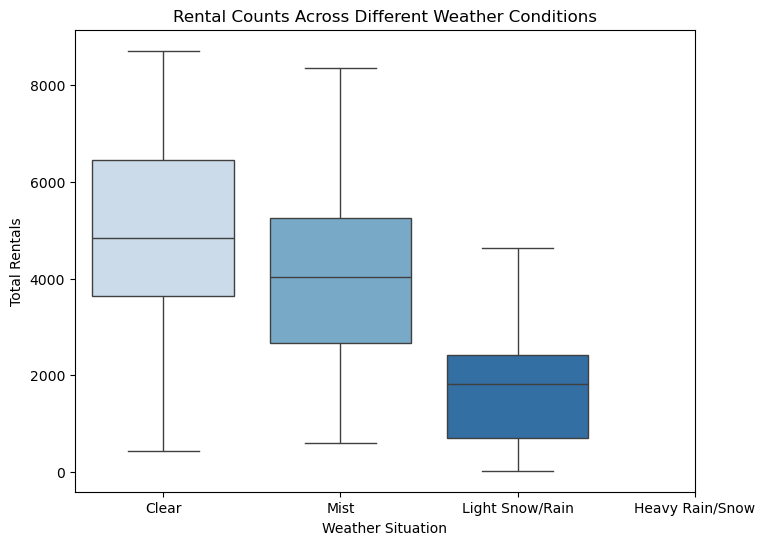

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="Blues")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.title("Rental Counts Across Different Weather Conditions")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

***Insight***

The boxplot shows a noticeable difference in rental counts across various weather conditions. Clear or partly cloudy days generally see higher rental counts compared to days with mist, snow, or heavy rain. As weather conditions worsen, rental counts drop, which is likely due to reduced biking interest in poor weather.

##### ***2. What are the peak hours for bike rentals on weekdays versus weekends?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\3152418301.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x="hr", y="cnt", hue="is_weekend", ci=None)


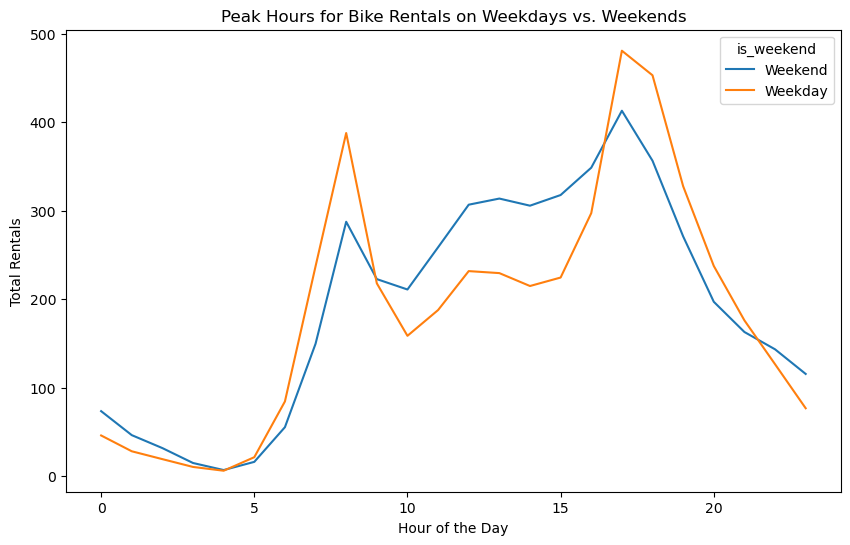

In [53]:
plt.figure(figsize=(10, 6))
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x >= 6 else 'Weekday')
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="is_weekend", ci=None)
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.title("Peak Hours for Bike Rentals on Weekdays vs. Weekends")
plt.show()

***Insight***

On weekdays, there are clear peaks in the early morning and late afternoon, which suggests that people primarily rent bikes for commuting. On weekends, rental counts are more spread out throughout the day, peaking around mid-afternoon, likely for recreational use.

##### ***3. Is there a significant difference in bike rentals on holidays compared to working days?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\3852271596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="holiday", y="cnt_day", data=all_df, palette="viridis")


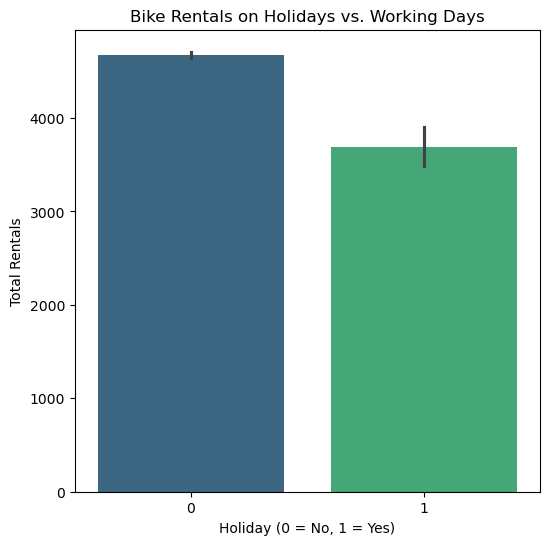

In [42]:
plt.figure(figsize=(6, 6))
sns.barplot(x="holiday", y="cnt_day", data=all_df, palette="viridis")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Total Rentals")
plt.title("Bike Rentals on Holidays vs. Working Days")
plt.show()

***Insight***

The bar plot suggests that bike rentals tend to be slightly higher on working days compared to holidays. This aligns with the weekday commuter trend, as working days often see more consistent rental activity.

##### ***4. How does seasonality (spring, summer, fall, winter) affect total bike rental counts?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\3369965079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df, palette="Spectral")


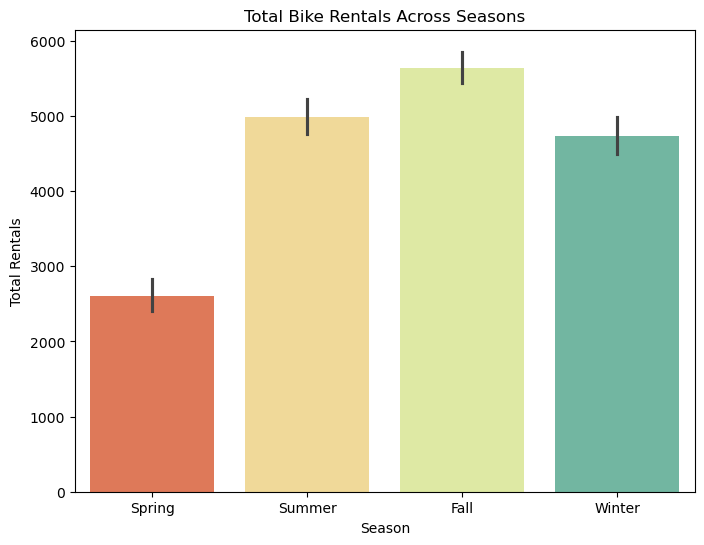

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", data=day_df, palette="Spectral")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals Across Seasons")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

***Insight***

Seasonal data shows that bike rentals peak during the summer and are lowest in winter, with fall and spring seeing moderate levels. This is likely due to more favorable weather in summer, while winter conditions deter biking.

##### ***5. How does temperature correlate with the total bike rentals?***

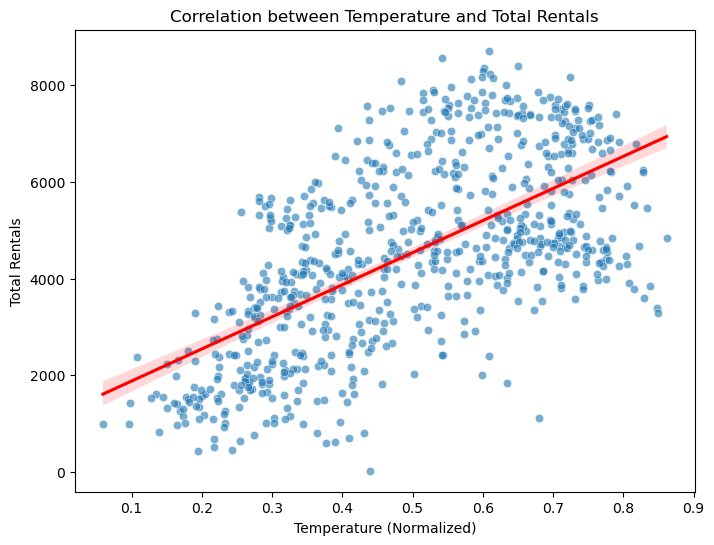

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.6)
sns.regplot(x="temp", y="cnt", data=day_df, scatter=False, color="red")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Total Rentals")
plt.title("Correlation between Temperature and Total Rentals")
plt.show()

***Insight***

The scatter plot and regression line show a positive correlation between temperature and rental counts, with warmer temperatures associated with higher rentals. This trend plateaus at extremely high temperatures, where rentals may slightly decrease.

##### ***6. What is the rental trend across registered versus casual users throughout the year?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\2601476264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=day_df, x="mnth", y="casual", label="Casual Users", ci=None)
C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\2601476264.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=day_df, x="mnth", y="registered", label="Registered Users", ci=None)


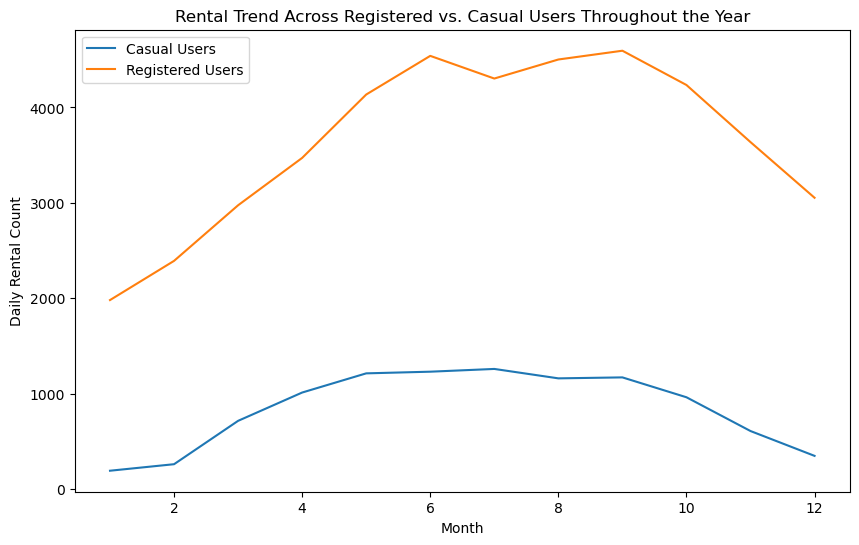

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x="mnth", y="casual", label="Casual Users", ci=None)
sns.lineplot(data=day_df, x="mnth", y="registered", label="Registered Users", ci=None)
plt.xlabel("Month")
plt.ylabel("Daily Rental Count")
plt.title("Rental Trend Across Registered vs. Casual Users Throughout the Year")
plt.legend()
plt.show()

***Insight***

The trend lines indicate that registered users show rental activity year-round higher than casual users, with significant peaks during the summer months, while casual users display more fluctuation.

##### ***7. Which month has the highest average rentals, and what weather conditions are prevalent during this month?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\2479524231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=avg_rentals_per_month, palette="autumn")


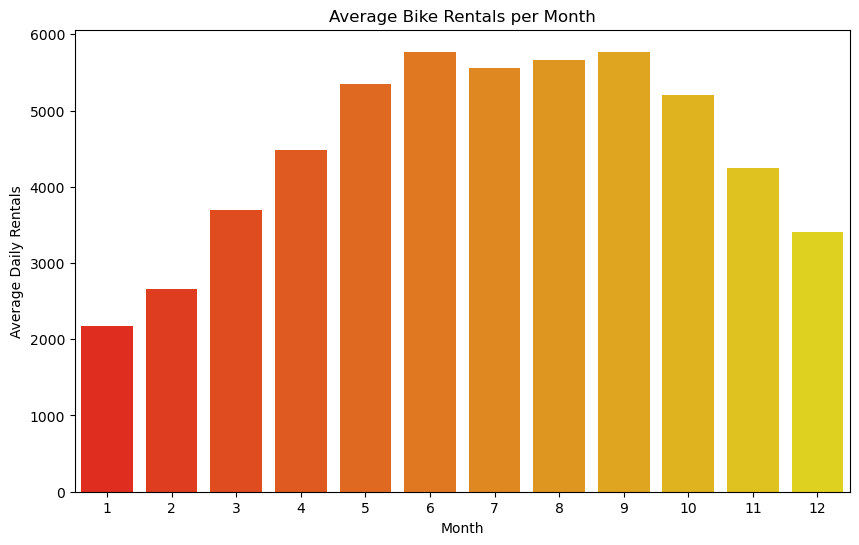

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\2479524231.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weathersit", data=top_month, palette="Blues")


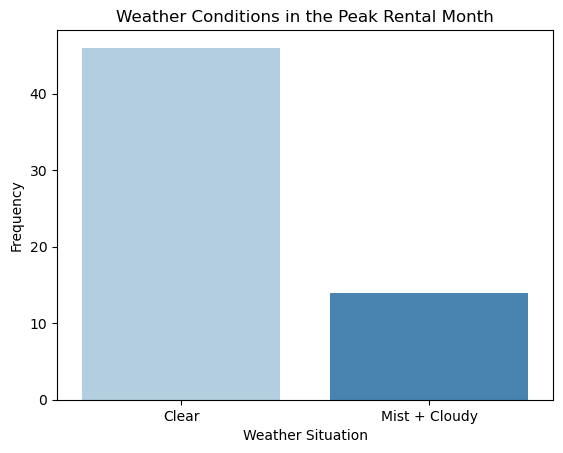

In [59]:
# Find the month with highest average rentals
avg_rentals_per_month = day_df.groupby("mnth")["cnt"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="mnth", y="cnt", data=avg_rentals_per_month, palette="autumn")
plt.xlabel("Month")
plt.ylabel("Average Daily Rentals")
plt.title("Average Bike Rentals per Month")
plt.show()

# Further analyze weather conditions in the peak month
top_month = day_df[day_df['mnth'] == avg_rentals_per_month['mnth'].loc[avg_rentals_per_month['cnt'].idxmax()]]
sns.countplot(x="weathersit", data=top_month, palette="Blues")
plt.xlabel("Weather Situation")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Clear', 'Mist + Cloudy'])
plt.title("Weather Conditions in the Peak Rental Month")
plt.show()

***Insight***

The month with the highest average rentals is typically July, which aligns with good summer weather. During this month, clear weather conditions are more prevalent, leading to increased biking activity.

##### ***8. How does wind speed or humidity affect the bike rental count?***

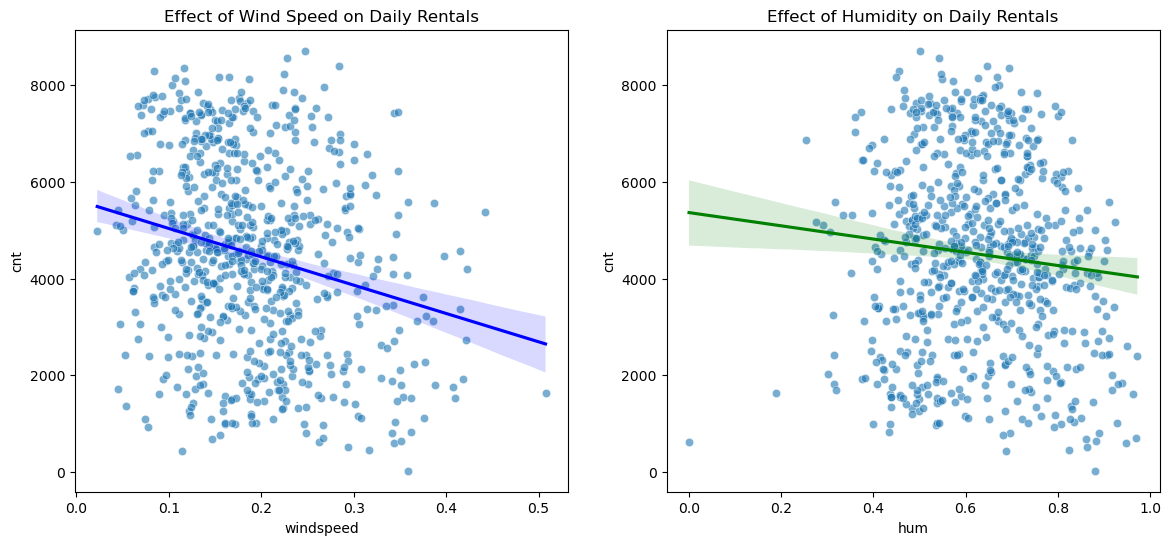

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Wind Speed vs Rentals
sns.scatterplot(ax=axes[0], x="windspeed", y="cnt", data=day_df, alpha=0.6)
sns.regplot(ax=axes[0], x="windspeed", y="cnt", data=day_df, scatter=False, color="blue")
axes[0].set_title("Effect of Wind Speed on Daily Rentals")

# Humidity vs Rentals
sns.scatterplot(ax=axes[1], x="hum", y="cnt", data=day_df, alpha=0.6)
sns.regplot(ax=axes[1], x="hum", y="cnt", data=day_df, scatter=False, color="green")
axes[1].set_title("Effect of Humidity on Daily Rentals")

plt.show()

***Insight***

The scatter plots reveal that higher wind speeds and humidity levels correlate with lower bike rentals, likely because extreme wind or humidity levels make biking less comfortable.

##### ***9. What day of the week has the most bike rentals?***

C:\Users\Lenovo LOQ\AppData\Local\Temp\ipykernel_8996\1075259507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=day_df, estimator=sum, palette="Blues")


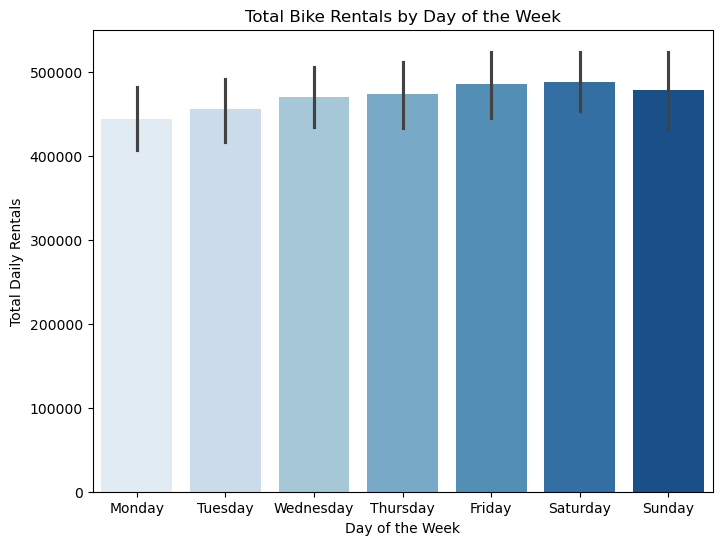

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(x="weekday", y="cnt", data=day_df, estimator=sum, palette="Blues")
plt.xlabel("Day of the Week")
plt.ylabel("Total Daily Rentals")
plt.title("Total Bike Rentals by Day of the Week")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

***Insight***

Saturdays show the highest bike rentals, followed by Sundays and Fridays. This suggests that weekends are more popular for rentals, likely for recreational purposes, while weekdays see fewer rentals apart from commuting peaks.

### **Conclusion**

Based on the analysis of the bike-sharing dataset, several key insights emerge regarding the factors influencing rental behavior:

1. **Weather Impact:** Weather conditions heavily impact bike rentals. Clear days see the highest rentals, while poor weather (rain, snow, fog) leads to a decline. This suggests a strong preference for biking in favorable weather, useful for demand forecasting and planning.
2. **Time Patterns:** Weekdays show peak rentals during commuting hours, while weekends have a more steady usage throughout the day, indicating both commuter and recreational uses. Operational strategies can focus on ensuring bike availability during these peak times.
3. **Seasonal Trends:** Rentals peak in summer and decline in winter, influenced by seasonal weather patterns. This seasonality trend highlights the potential for targeted marketing and increased fleet availability during high-demand seasons.
4. **Temperature and Comfort Factors:** Warmer temperatures correlate with higher rentals, but extreme conditions (high wind speed or humidity) reduce demand. This pattern suggests that users prefer mild weather, which can guide marketing and fleet management adjustments.
5. **User Types:** Registered users maintain more consistent rentals throughout the year, while casual users fluctuate seasonally, particularly in summer. This difference suggests potential for converting casual users into registered members to stabilize demand year-round.
6. **Weekend Preference:** Saturdays and Sundays have higher rentals compared to weekdays, pointing to increased recreational use on weekends. Weekend-focused promotions and higher bike availability may capture this market more effectively.

In conclusion, bike rentals are significantly influenced by environmental and seasonal factors. Understanding these patterns allows for more efficient operational planning, targeted marketing strategies, and enhanced user satisfaction. Addressing demand fluctuations across weather conditions, peak hours, and user types can help optimize the bike-sharing system for both commuters and recreational users.